In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
import scipy.io as sio
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
from scipy import interpolate
from PIL import Image


---
# VIDEO: Rhythmicity in walking (gait)
---


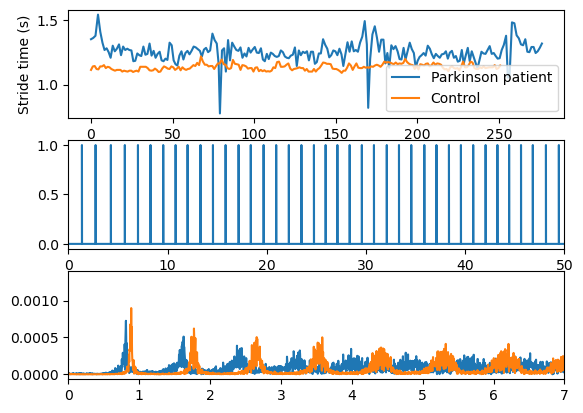

In [2]:
# Load the data. If you get an error on this line,
# make sure your Python session is in the same directory as the data.
matdata = sio.loadmat('gait.mat')

# extract data from mat file
park = matdata['park']
cont = matdata['cont']

# plot the gait speed for Parkinson's patient and control
plt.subplot2grid((3,1),(0,0))
plt.plot(park[:,0],park[:,1],label='Parkinson patient')
plt.plot(cont[:,0],cont[:,1],label='Control')
plt.xlabel('Time (sec.)')
plt.ylabel('Stride time (s)')
plt.legend()


#% define sampling rate
srate  = 1000

# create time series of steps
parkts = np.zeros(int(park[-1,0]*1000))
for i in range(0,len(park)):
    parkts[int(park[i,0]*1000-1)] = 1

# time vector and number of time points
parktx = np.arange(0,len(parkts))/srate
parkn  = len(parktx)


# repeat for control data
contts = np.zeros(int(cont[-1,0]*1000))
for i in range(0,len(cont)):
    contts[int(cont[i,0]*1000-1)] = 1

# time vector and number of time points
conttx = np.arange(0,len(contts))/srate
contn  = len(conttx)



# plot the time course of steps
plt.subplot2grid((3,1),(1,0))
plt.plot(parktx,parkts) # should be a stemplot, but that's really slow to render
plt.xlim([0,50])


# compute power for both datasets
parkPow = 2*np.abs(scipy.fftpack.fft(parkts)/parkn)
contPow = 2*np.abs(scipy.fftpack.fft(contts)/contn)

# compute separate frequencies vector for each subject
parkHz = np.linspace(0,srate/2,int(np.floor(parkn/2)+1))
contHz = np.linspace(0,srate/2,int(np.floor(contn/2)+1))

# show power spectra
plt.subplot2grid((3,1),(2,0))
plt.plot(parkHz[1:],parkPow[1:len(parkHz)])
plt.plot(contHz[1:],contPow[1:len(contHz)])
plt.xlim([0,7])

plt.show()

# SOURCES:
#  Data downloaded from https://physionet.org/physiobank/database/gaitdb/
#   Parkinson's patient data is pd1-si.txt
#   Young control data is y1-23.si.txt

1. M·ª•c ƒë√≠ch
M√£ ngu·ªìn n√†y ph√¢n t√≠ch v√† so s√°nh d·ªØ li·ªáu b∆∞·ªõc ƒëi (gait data) c·ªßa b·ªánh nh√¢n Parkinson v√† nh√≥m ƒë·ªëi ch·ª©ng (control).

2. C√°c b∆∞·ªõc ch√≠nh
N·∫°p d·ªØ li·ªáu t·ª´ t·ªáp gait.mat.
Tr√≠ch xu·∫•t d·ªØ li·ªáu: park (b·ªánh Parkinson) v√† cont (nh√≥m ƒë·ªëi ch·ª©ng).
V·∫Ω bi·ªÉu ƒë·ªì so s√°nh th·ªùi gian b∆∞·ªõc ƒëi gi·ªØa hai nh√≥m.
Chuy·ªÉn ƒë·ªïi d·ªØ li·ªáu th√†nh chu·ªói th·ªùi gian (time series) v·ªõi t·∫ßn su·∫•t l·∫•y m·∫´u 1000 Hz.
T√≠nh ph·ªï c√¥ng su·∫•t (Power Spectrum) s·ª≠ d·ª•ng bi·∫øn ƒë·ªïi Fourier (FFT).
V·∫Ω bi·ªÉu ƒë·ªì ph·ªï c√¥ng su·∫•t ƒë·ªÉ ph√¢n t√≠ch s·ª± kh√°c bi·ªát gi·ªØa hai nh√≥m.
3. Nh·∫≠n x√©t
S·ª≠ d·ª•ng FFT ƒë·ªÉ ph√¢n t√≠ch dao ƒë·ªông b∆∞·ªõc ƒëi.
Bi·ªÉu ƒë·ªì gi√∫p tr·ª±c quan h√≥a s·ª± kh√°c bi·ªát gi·ªØa b·ªánh nh√¢n Parkinson v√† nh√≥m ƒë·ªëi ch·ª©ng.
C√≥ th·ªÉ c·∫£i thi·ªán b·∫±ng c√°ch s·ª≠ d·ª•ng plt.stem() thay v√¨ plt.plot() cho chu·ªói th·ªùi gian b∆∞·ªõc ƒëi.


---
# VIDEO: Rhythmicity in brain waves
---


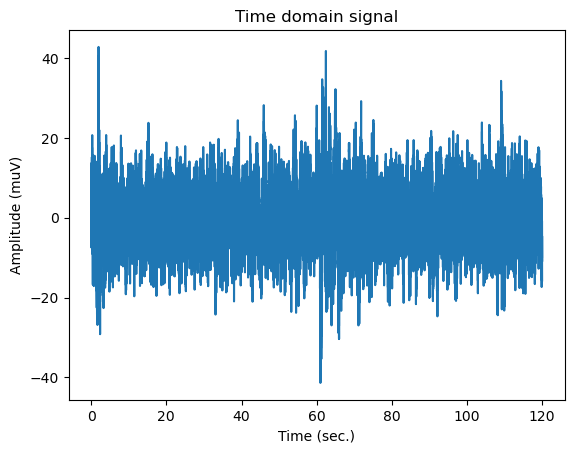

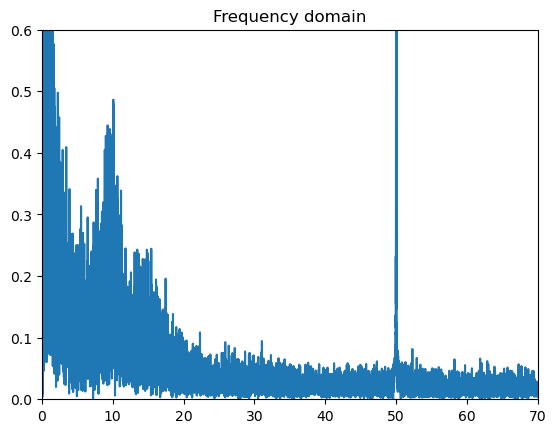

In [3]:

matdata = sio.loadmat('EEGrestingState.mat')

# extract data from mat file
eegdata = matdata['eegdata']
eegdata = eegdata[0]
srate   = matdata['srate']
srate   = srate[0]


n = len(eegdata)
timevec = np.arange(n)/srate

# compute amplitude spectrum
dataX    = scipy.fftpack.fft(eegdata)/n
ampspect = 2*abs(dataX)
hz       = np.linspace(0,srate/2,int(np.floor(n/2)+1))

plt.plot(timevec,eegdata)
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude (muV)')
plt.title('Time domain signal')
plt.show()

# show amplitude spectrum
plt.plot(hz,ampspect[0:int(np.floor(n/2)+1)])
plt.xlim([0,70])
plt.ylim([0,.6])
plt.title('Frequency domain')
plt.show()

1. N·∫°p d·ªØ li·ªáu
ƒê·ªçc d·ªØ li·ªáu EEG (eegdata) v√† t·∫ßn s·ªë l·∫•y m·∫´u (srate) t·ª´ t·ªáp .mat.
T·∫°o vector th·ªùi gian timevec d·ª±a tr√™n s·ªë m·∫´u (n) v√† t·∫ßn s·ªë l·∫•y m·∫´u.
2. Hi·ªÉn th·ªã t√≠n hi·ªáu trong mi·ªÅn th·ªùi gian
V·∫Ω t√≠n hi·ªáu EEG theo th·ªùi gian b·∫±ng plt.plot(timevec, eegdata).
3. Ph√¢n t√≠ch mi·ªÅn t·∫ßn s·ªë
T√≠nh bi·∫øn ƒë·ªïi Fourier (FFT) ƒë·ªÉ thu ƒë∆∞·ª£c ph·ªï bi√™n ƒë·ªô (ampspect).
X√¢y d·ª±ng tr·ª•c t·∫ßn s·ªë (hz) v√† ch·ªâ l·∫•y n·ª≠a ƒë·∫ßu ph·ªï t·∫ßn s·ªë (do t√≠nh ch·∫•t ƒë·ªëi x·ª©ng c·ªßa FFT).
V·∫Ω ph·ªï t·∫ßn s·ªë v·ªõi tr·ª•c x t·ª´ 0 ƒë·∫øn 70 Hz.
4. Nh·∫≠n x√©t
M√£ ch·∫°y ·ªïn, nh∆∞ng Amplitude (muV) n√™n vi·∫øt ƒë√∫ng Amplitude (¬µV) ƒë·ªÉ tr√°nh l·ªói escape sequence.
C√≥ th·ªÉ d√πng plt.xscale('log') ƒë·ªÉ hi·ªÉn th·ªã ph·ªï t·∫ßn s·ªë t·ªët h∆°n n·∫øu c·∫ßn.
ƒê·ªÉ l·ªçc t√≠n hi·ªáu theo t·∫ßn s·ªë c·ª• th·ªÉ, c√≥ th·ªÉ √°p d·ª•ng b·ªô l·ªçc th√¥ng th·∫•p ho·∫∑c th√¥ng cao.

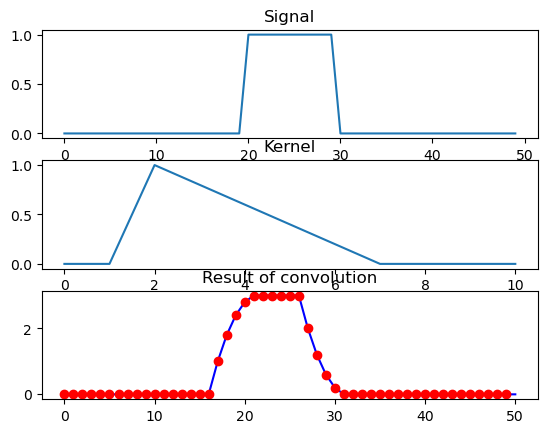

In [13]:

m = 50 # length of signal
n = 11 # length of kernel

signal = np.zeros(m)
signal[range(int(m*.4),int(m*.6))] = 1


kernel = np.zeros(n)
kernel[range(int(n*.25),int(n*.8))] = np.linspace(1,0,int(n*.55))


# plot signal
plt.subplot2grid((3,1),(0,0))
plt.plot(signal)
plt.title('Signal')

# plot kernel
plt.subplot2grid((3,1),(1,0))
plt.plot(kernel)
plt.title('Kernel')


# setup convolution parameters
nConv = m+n-1
halfk = np.floor(n/2)

# convolution as point-wise multiplication of spectra and inverse
mx = scipy.fftpack.fft(signal,nConv)
nx = scipy.fftpack.fft(kernel,nConv)
# here's the convolution:
convres = np.real( scipy.fftpack.ifft( np.multiply(mx,nx) ) )
# chop off the 'wings' of convolution
convres = convres[range(int(halfk),int(len(convres)-halfk+1))]


# plot the result of convolution
plt.subplot2grid((3,1),(2,0))
plt.plot(convres,'b')
plt.title('Result of convolution')

# for comparison, plot against the Python convolution function
plt.plot(np.convolve(signal,kernel,mode='same'),'ro')

plt.show()


---
# VIDEO: Convolution theorem
---


1. Kh·ªüi t·∫°o d·ªØ li·ªáu
T·∫°o t√≠n hi·ªáu (signal): Chu·ªói nh·ªã ph√¢n d√†i 50 m·∫´u, v·ªõi m·ªôt ƒëo·∫°n t·ª´ 40% ƒë·∫øn 60% c·ªßa chi·ªÅu d√†i c√≥ gi√° tr·ªã 1, c√≤n l·∫°i l√† 0.
T·∫°o h·∫°t nh√¢n (kernel): Chu·ªói d√†i 11 m·∫´u, v·ªõi ph·∫ßn gi·ªØa c√≥ gi√° tr·ªã gi·∫£m d·∫ßn t·ª´ 1 ƒë·∫øn 0.
2. V·∫Ω t√≠n hi·ªáu v√† h·∫°t nh√¢n
Bi·ªÉu ƒë·ªì ƒë·∫ßu ti√™n: T√≠n hi·ªáu g·ªëc (signal).
Bi·ªÉu ƒë·ªì th·ª© hai: H·∫°t nh√¢n (kernel).
3. T√≠ch ch·∫≠p b·∫±ng bi·∫øn ƒë·ªïi Fourier
T√≠nh bi·∫øn ƒë·ªïi Fourier (FFT) c·ªßa signal v√† kernel v·ªõi k√≠ch th∆∞·ªõc nConv = m + n - 1.
Nh√¢n ph·ªï (mx * nx) r·ªìi l·∫•y bi·∫øn ƒë·ªïi ng∆∞·ª£c (IFFT) ƒë·ªÉ thu ƒë∆∞·ª£c k·∫øt qu·∫£ t√≠ch ch·∫≠p (convres).
C·∫Øt b·ªõt ph·∫ßn d∆∞ th·ª´a c·ªßa t√≠n hi·ªáu ƒë·ªÉ gi·ªØ nguy√™n k√≠ch th∆∞·ªõc h·ª£p l√Ω.
4. V·∫Ω k·∫øt qu·∫£ t√≠ch ch·∫≠p
Bi·ªÉu ƒë·ªì th·ª© ba: K·∫øt qu·∫£ t√≠ch ch·∫≠p b·∫±ng FFT (m√†u xanh).
So s√°nh v·ªõi h√†m np.convolve() c·ªßa NumPy (m√†u ƒë·ªè), gi√∫p ki·ªÉm tra t√≠nh ch√≠nh x√°c.
5. Nh·∫≠n x√©t
∆Øu ƒëi·ªÉm:

S·ª≠ d·ª•ng FFT gi√∫p tƒÉng t·ªëc so v·ªõi t√≠ch ch·∫≠p th√¥ng th∆∞·ªùng (ƒë·∫∑c bi·ªát v·ªõi t√≠n hi·ªáu d√†i).
Bi·ªÉu ƒë·ªì so s√°nh gi√∫p x√°c minh ƒë·ªô ch√≠nh x√°c c·ªßa ph∆∞∆°ng ph√°p FFT.


---
# VIDEO: Narrowband temporal filtering
---


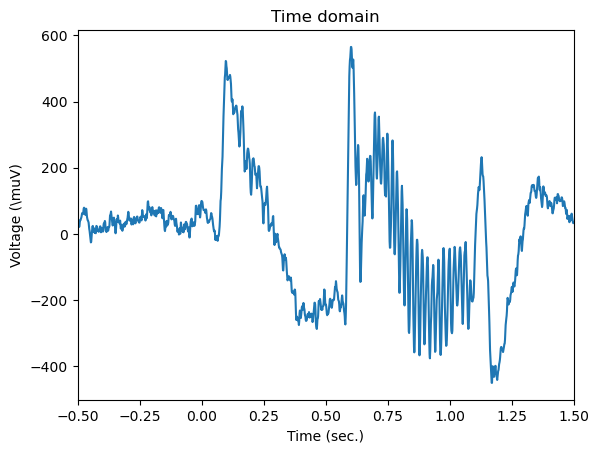

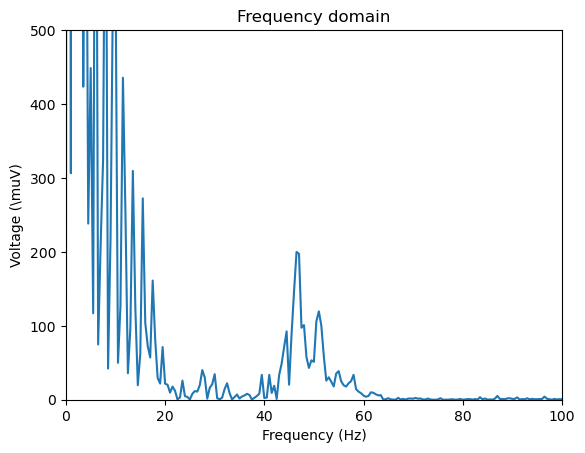

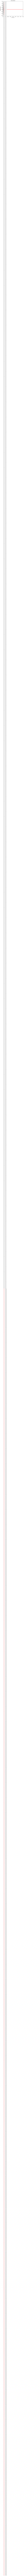

In [14]:

matdata = sio.loadmat('braindata.mat')

# extract data from mat file
timevec = matdata['timevec']
timevec = timevec[0]
srate    = matdata['srate']
srate    = srate[0]
braindata = matdata['braindata']
braindata = braindata[0]


n = len(timevec)

# plot time-domain signal
plt.plot(timevec,braindata)
plt.xlim([-.5,1.5])
plt.xlabel('Time (sec.)')
plt.ylabel(r'Voltage (\muV)')
plt.title('Time domain')
plt.show()


# compute power spectrum
dataX    = scipy.fftpack.fft(braindata)/n
ampspect = 2*np.abs(dataX)**2
hz       = np.linspace(0,srate,n) # out to srate as trick for the filter

# plot power spectrum
plt.plot(hz,ampspect[0:len(hz)])
plt.xlim([0,100])
plt.ylim([0,500])
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Voltage (\muV)')
plt.title('Frequency domain')
plt.show()


# specify which frequencies to filter
peakFiltFreqs = [2,47] # Hz

c = 'kr' # line colors

# loop over frequencies
for fi in range(0,len(peakFiltFreqs)):
    
    # construct the filter
    x  = hz-peakFiltFreqs[fi] # shifted frequencies
    fx = np.exp(-(x/4)**2)    # gaussian
    
    # apply the filter to the data
    filtdat = 2*np.real( scipy.fftpack.ifft( np.multiply(dataX,fx) ))
    
    # show the results
    plt.plot(timevec,filtdat,c[fi],label='%g Hz' %peakFiltFreqs[fi])
    plt.xlim([-.5,1.5])
    plt.xlabel('Time (sec.)')
    plt.ylabel(r'Voltage (\muV)')
    plt.title('Time domain')

plt.legend()
plt.show()

1. T·∫£i v√† tr√≠ch xu·∫•t d·ªØ li·ªáu
ƒê·ªçc t·ªáp .mat b·∫±ng scipy.io.loadmat().
L·∫•y c√°c th√¥ng s·ªë quan tr·ªçng:
timevec: Tr·ª•c th·ªùi gian.
srate: T·∫ßn s·ªë l·∫•y m·∫´u.
braindata: D·ªØ li·ªáu t√≠n hi·ªáu EEG.
2. V·∫Ω t√≠n hi·ªáu trong mi·ªÅn th·ªùi gian
S·ª≠ d·ª•ng plt.plot() ƒë·ªÉ hi·ªÉn th·ªã t√≠n hi·ªáu EEG theo th·ªùi gian.
Gi·ªõi h·∫°n tr·ª•c x t·ª´ -0.5 ƒë·∫øn 1.5 gi√¢y.
Nh√£n tr·ª•c y s·ª≠ d·ª•ng LaTeX (r'Voltage (\muV)') ƒë·ªÉ hi·ªÉn th·ªã ƒë∆°n v·ªã microvolt (¬µV).
3. T√≠nh v√† v·∫Ω ph·ªï bi√™n ƒë·ªô (Amplitude Spectrum)
S·ª≠ d·ª•ng Bi·∫øn ƒë·ªïi Fourier (FFT) ƒë·ªÉ chuy·ªÉn ƒë·ªïi sang mi·ªÅn t·∫ßn s·ªë.
T√≠nh ph·ªï c√¥ng su·∫•t (Power Spectrum).
V·∫Ω bi·ªÉu ƒë·ªì v·ªõi t·∫ßn s·ªë t·ª´ 0 ƒë·∫øn 100 Hz.
4. L·ªçc t√≠n hi·ªáu b·∫±ng b·ªô l·ªçc Gaussian
Ch·ªçn t·∫ßn s·ªë c·∫ßn l·ªçc: 2 Hz v√† 47 Hz.
T·∫°o b·ªô l·ªçc Gaussian.
Nh√¢n ph·ªï t√≠n hi·ªáu v·ªõi b·ªô l·ªçc trong mi·ªÅn t·∫ßn s·ªë, r·ªìi chuy·ªÉn ng∆∞·ª£c l·∫°i mi·ªÅn th·ªùi gian b·∫±ng IFFT.
V·∫Ω k·∫øt qu·∫£ v·ªõi m√†u s·∫Øc t∆∞∆°ng ·ª©ng.
5. Nh·∫≠n x√©t
 ∆Øu ƒëi·ªÉm:

S·ª≠ d·ª•ng FFT gi√∫p ph√¢n t√≠ch nhanh t√≠n hi·ªáu trong mi·ªÅn t·∫ßn s·ªë.
L·ªçc b·∫±ng Gaussian gi√∫p lo·∫°i b·ªè t·∫ßn s·ªë kh√¥ng mong mu·ªën.
Bi·ªÉu ƒë·ªì so s√°nh gi√∫p ki·ªÉm tra hi·ªáu qu·∫£ c·ªßa b·ªô l·ªçc.
 H·∫°n ch·∫ø & C·∫£i ti·∫øn:

Ch·ªâ l·ªçc hai t·∫ßn s·ªë c·ªë ƒë·ªãnh (2 Hz v√† 47 Hz), c√≥ th·ªÉ c·∫£i ti·∫øn b·∫±ng l·ªçc th√¥ng cao/th·∫•p/bandpass.
C√≥ th·ªÉ chu·∫©n h√≥a d·ªØ li·ªáu tr∆∞·ªõc khi th·ª±c hi·ªán FFT ƒë·ªÉ c√≥ k·∫øt qu·∫£ t·ªët h∆°n.


---
# VIDEO: Image smoothing and sharpening
---


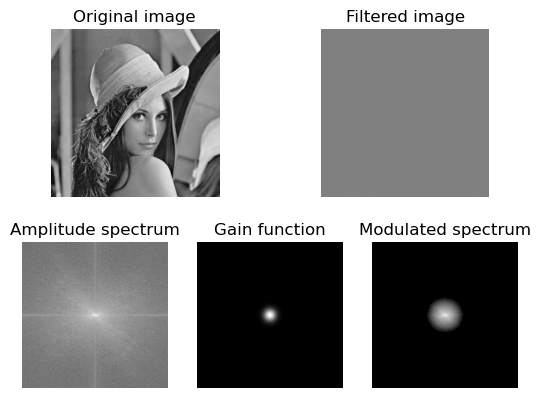

In [11]:
# load image and convert to float
lenna = np.asarray( Image.open("Lenna.png") )
imgL  = np.mean(lenna,axis=2)

# plot original image
plt.subplot2grid((2,2),(0,0))
plt.imshow(imgL,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Original image')


# and its power spectrum
imgX  = scipy.fftpack.fftshift(scipy.fftpack.fft2(imgL))
powr2 = np.log(np.abs(imgX))

plt.subplot2grid((2,3),(1,0))
plt.imshow(powr2,cmap=plt.cm.gray)
plt.clim([0,15])
plt.axis('off')
plt.title('Amplitude spectrum')


# filter kernel is a Gaussian
width = .1 # width of gaussian (normalized Z units)
lims  = np.shape(imgL)
xr    = stats.zscore(np.arange(lims[0]))
[x,y] = np.meshgrid(xr,xr)

# add 1- at beginning of the next line to invert the filter
gaus2d = np.exp( -( x**2 + y**2 ) / (2*width**2) )


# show Gaussian
plt.subplot2grid((2,3),(1,1))
plt.imshow(gaus2d,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gain function')


# show modulated spectrum
plt.subplot2grid((2,3),(1,2))
plt.imshow( np.log(np.abs( np.multiply(imgX,gaus2d)) ) ,cmap=plt.cm.gray)
plt.axis('off')
plt.clim([0,15])
plt.title('Modulated spectrum')


# and the reconstructed image
imgrecon = np.real(scipy.fftpack.ifft2( np.multiply(imgX,gaus2d) ))

plt.subplot2grid((2,2),(0,1))
plt.imshow( imgrecon ,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Filtered image')

plt.show()

1. T·∫£i v√† chuy·ªÉn ƒë·ªïi ·∫£nh sang grayscale
ƒê·ªçc ·∫£nh "Lenna.png" b·∫±ng Image.open().
Chuy·ªÉn ·∫£nh v·ªÅ grayscale b·∫±ng c√°ch l·∫•y trung b√¨nh 3 k√™nh m√†u (np.mean(lenna,axis=2)).
üìå M·ª•c ƒë√≠ch: ƒê∆°n gi·∫£n h√≥a x·ª≠ l√Ω b·∫±ng c√°ch l√†m vi·ªác v·ªõi ·∫£nh x√°m thay v√¨ ·∫£nh m√†u.

2. T√≠nh ph·ªï bi√™n ƒë·ªô c·ªßa ·∫£nh
Th·ª±c hi·ªán Bi·∫øn ƒë·ªïi Fourier 2D (fft2) ƒë·ªÉ ƒë∆∞a ·∫£nh sang mi·ªÅn t·∫ßn s·ªë.
D·ªãch t·∫ßn s·ªë v·ªÅ trung t√¢m (fftshift).
T√≠nh ph·ªï bi√™n ƒë·ªô (Amplitude Spectrum) b·∫±ng log(abs(imgX)).
üìå M·ª•c ƒë√≠ch: X√°c ƒë·ªãnh c√°c th√†nh ph·∫ßn t·∫ßn s·ªë cao/th·∫•p trong ·∫£nh.

3. T·∫°o b·ªô l·ªçc Gaussian
B·ªô l·ªçc Gaussian 2D ƒë∆∞·ª£c t·∫°o d·ª±a tr√™n t·ªça ƒë·ªô ·∫£nh.
Tham s·ªë width x√°c ƒë·ªãnh ƒë·ªô r·ªông c·ªßa b·ªô l·ªçc (t·∫ßn s·ªë th·∫•p ƒë∆∞·ª£c gi·ªØ l·∫°i, t·∫ßn s·ªë cao b·ªã tri·ªát ti√™u).
üìå M·ª•c ƒë√≠ch: Gi·ªØ l·∫°i t·∫ßn s·ªë th·∫•p (chi ti·∫øt l·ªõn), lo·∫°i b·ªè t·∫ßn s·ªë cao (nhi·ªÖu, chi ti·∫øt nh·ªè).

4. √Åp d·ª•ng b·ªô l·ªçc v√† t√°i t·∫°o ·∫£nh
Nh√¢n ph·ªï bi√™n ƒë·ªô v·ªõi b·ªô l·ªçc Gaussian (np.multiply(imgX,gaus2d)).
Th·ª±c hi·ªán Bi·∫øn ƒë·ªïi Fourier ng∆∞·ª£c (ifft2) ƒë·ªÉ quay l·∫°i mi·ªÅn kh√¥ng gian.
Hi·ªÉn th·ªã ·∫£nh sau khi l·ªçc.
üìå M·ª•c ƒë√≠ch: L√†m m·ªù ·∫£nh (Gaussian Blur) b·∫±ng c√°ch lo·∫°i b·ªè t·∫ßn s·ªë cao.

5. Hi·ªÉn th·ªã k·∫øt qu·∫£
M√£ ngu·ªìn v·∫Ω 6 bi·ªÉu ƒë·ªì:  ·∫¢nh g·ªëc
 Ph·ªï bi√™n ƒë·ªô (FFT)
 B·ªô l·ªçc Gaussian
 Ph·ªï ƒë√£ l·ªçc
 ·∫¢nh t√°i t·∫°o sau khi l·ªçc

Nh·∫≠n x√©t & C·∫£i ti·∫øn
 ∆Øu ƒëi·ªÉm:

L·ªçc Gaussian trong mi·ªÅn t·∫ßn s·ªë gi√∫p l√†m m·ªù ·∫£nh m∆∞·ª£t m√† h∆°n so v·ªõi l·ªçc trong mi·ªÅn kh√¥ng gian.
C√≥ th·ªÉ d·ªÖ d√†ng ƒëi·ªÅu ch·ªânh tham s·ªë width ƒë·ªÉ ki·ªÉm so√°t m·ª©c ƒë·ªô l√†m m·ªù.
 C·∫£i ti·∫øn:

Th·ª≠ nghi·ªám v·ªõi c√°c b·ªô l·ªçc kh√°c nh∆∞ l·ªçc th√¥ng cao (High-pass) ƒë·ªÉ l√†m s·∫Øc n√©t ·∫£nh.
ƒêi·ªÅu ch·ªânh gi√° tr·ªã width ƒë·ªÉ thay ƒë·ªïi m·ª©c ƒë·ªô l√†m m·ªù.


---
# VIDEO: Image narrowband filtering
---


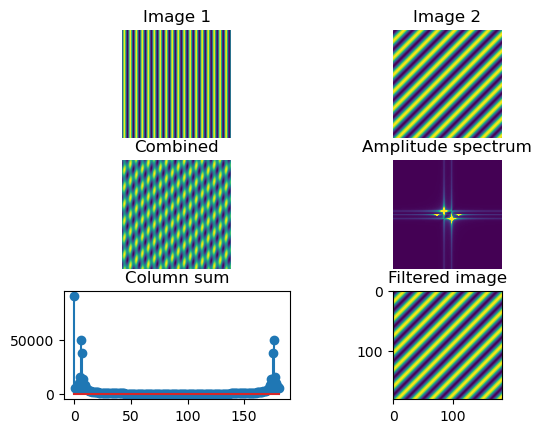

In [12]:

# specify vector of sine phases
sinephas = [ 0 , np.pi/4 ]

# vector of sine frequencies
sinefreq = [.1 , .05] # arbitrary units


# sine wave initializations
lims  = [-91,91]
[x,y] = np.meshgrid(range(lims[0],lims[1]),range(lims[0],lims[1]))


# compute 2D sine gradients
xp = x*np.cos(sinephas[0]) + y*np.sin(sinephas[0])
img1 = np.sin( 2*np.pi*sinefreq[0]*xp )

xp = x*np.cos(sinephas[1]) + y*np.sin(sinephas[1])
img2 = np.sin( 2*np.pi*sinefreq[1]*xp )

# combine images
img = img1+img2



# show original two gradients
plt.subplot2grid((3,2),(0,0))
plt.imshow(img1)
plt.axis('off')
plt.title('Image 1')

plt.subplot2grid((3,2),(0,1))
plt.imshow(img2)
plt.axis('off')
plt.title('Image 2')


# show sum
plt.subplot2grid((3,2),(1,0))
plt.imshow(img)
plt.axis('off')
plt.title('Combined')


# FFT
imgX    = scipy.fftpack.fft2(img)
imgXamp = np.abs(imgX)

# show amplitude spectrum
plt.subplot2grid((3,2),(1,1))
plt.imshow(scipy.fftpack.fftshift(imgXamp))
plt.axis('off')
plt.clim([0,500])
plt.title('Amplitude spectrum')

# show sum down columns
plt.subplot2grid((3,2),(2,0))
plt.stem(np.sum(imgXamp,axis=1))
plt.title('Column sum')

# replace 1st column with last
imgX[0,:] = imgX[-1,:]

# reconstructed image
imgrecon  = np.real( scipy.fftpack.ifft2(imgX) )

plt.subplot2grid((3,2),(2,1))
plt.imshow(imgrecon)
plt.title('Filtered image')

plt.show()

1. T·∫°o s√≥ng sin 2D v·ªõi c√°c t·∫ßn s·ªë v√† pha kh√°c nhau
X√°c ƒë·ªãnh hai pha s√≥ng: sinephas = [0, œÄ/4]
X√°c ƒë·ªãnh hai t·∫ßn s·ªë s√≥ng: sinefreq = [0.1, 0.05]
T·∫°o l∆∞·ªõi t·ªça ƒë·ªô (x, y) t·ª´ -91 ƒë·∫øn 91.
T√≠nh 2 ·∫£nh s√≥ng sin theo t·ª´ng pha v√† t·∫ßn s·ªë.
üìå M·ª•c ƒë√≠ch: T·∫°o hai m√¥ h√¨nh s√≥ng sin 2D, sau ƒë√≥ k·∫øt h·ª£p ch√∫ng.

2. Hi·ªÉn th·ªã ·∫£nh g·ªëc v√† t·ªïng h·ª£p
V·∫Ω img1 (s√≥ng sin 1) v√† img2 (s√≥ng sin 2).
T·∫°o ·∫£nh img = img1 + img2, t·ª©c l√† t·ªïng h·ª£p hai ·∫£nh s√≥ng sin.
üìå M·ª•c ƒë√≠ch: Xem ·∫£nh g·ªëc v√† s·ª± giao thoa c·ªßa hai s√≥ng.

3. Ph√¢n t√≠ch mi·ªÅn t·∫ßn s·ªë b·∫±ng Bi·∫øn ƒë·ªïi Fourier
D√πng FFT 2D (fft2) ƒë·ªÉ ƒë∆∞a ·∫£nh img sang mi·ªÅn t·∫ßn s·ªë.
T√≠nh bi√™n ƒë·ªô ph·ªï (np.abs(imgX)).
D·ªãch ph·ªï v·ªÅ trung t√¢m (fftshift(imgXamp)) ƒë·ªÉ d·ªÖ quan s√°t.
üìå M·ª•c ƒë√≠ch: Xem th√†nh ph·∫ßn t·∫ßn s·ªë c·ªßa ·∫£nh d∆∞·ªõi d·∫°ng ph·ªï bi√™n ƒë·ªô.

4. Bi·∫øn ƒë·ªïi v√† l·ªçc t·∫ßn s·ªë
T√≠nh t·ªïng bi√™n ƒë·ªô tr√™n t·ª´ng c·ªôt (np.sum(imgXamp,axis=1)) v√† v·∫Ω bi·ªÉu ƒë·ªì.
Thay th·∫ø c·ªôt ƒë·∫ßu ti√™n c·ªßa ph·ªï t·∫ßn s·ªë b·∫±ng c·ªôt cu·ªëi c√πng (imgX[0,:] = imgX[-1,:]).
Th·ª±c hi·ªán Bi·∫øn ƒë·ªïi Fourier ng∆∞·ª£c (ifft2) ƒë·ªÉ t√°i t·∫°o ·∫£nh sau l·ªçc.
üìå M·ª•c ƒë√≠ch: Th·ª≠ nghi·ªám l·ªçc t·∫ßn s·ªë v√† xem ·∫£nh t√°i t·∫°o.

5. Hi·ªÉn th·ªã k·∫øt qu·∫£
M√£ ngu·ªìn v·∫Ω 6 h√¨nh: ‚úÖ ·∫¢nh s√≥ng sin 1
‚úÖ ·∫¢nh s√≥ng sin 2
‚úÖ ·∫¢nh t·ªïng h·ª£p (c·ªông hai ·∫£nh s√≥ng)
‚úÖ Ph·ªï bi√™n ƒë·ªô (FFT)
‚úÖ T·ªïng bi√™n ƒë·ªô tr√™n t·ª´ng c·ªôt
‚úÖ ·∫¢nh t√°i t·∫°o sau l·ªçc

Nh·∫≠n x√©t & ·ª®ng d·ª•ng
‚úÖ ∆Øu ƒëi·ªÉm:

Hi·ªÉu c·∫•u tr√∫c t·∫ßn s·ªë c·ªßa ·∫£nh t·ª´ t√≠n hi·ªáu s√≥ng sin.
T·ªïng h·ª£p s√≥ng sin gi√∫p m√¥ ph·ªèng m·∫´u ·∫£nh c√≥ c·∫•u tr√∫c tu·∫ßn ho√†n.
C√≥ th·ªÉ d√πng ƒë·ªÉ t·∫°o m·∫´u s√≥ng, l·ªçc t·∫ßn s·ªë, v√† ph√¢n t√≠ch ·∫£nh nhi·ªÖu.
‚ö†Ô∏è C·∫£i ti·∫øn:

ƒêi·ªÅu ch·ªânh t·∫ßn s·ªë v√† pha ƒë·ªÉ t·∫°o c√°c m·∫´u kh√°c nhau.
Th·ª≠ nghi·ªám c√°c b·ªô l·ªçc kh√°c tr√™n ph·ªï Fourier.
S·ª≠ d·ª•ng Gabor filter thay v√¨ s√≥ng sin thu·∫ßn t√∫y.
üìå ·ª®ng d·ª•ng: X·ª≠ l√Ω ·∫£nh, n√©n ·∫£nh, th·ªã gi√°c m√°y t√≠nh, m√¥ ph·ªèng s√≥ng, ph√¢n t√≠ch k·∫øt c·∫•u ·∫£nh. üöÄ